In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
%matplotlib inline

from pycocotools.coco import COCO
import numpy as np
import PIL
from PIL import Image
import os, random, time

import torch
import torchvision.transforms as tvt
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision   

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd

import matplotlib.pyplot as plt

# Creating Your Own Image Classification Dataset

The COCO Python API was used to complete this task. The code used is in the .py file attached. Nonetheless, the following fundamental procedure was followed. 

1. Collect images that correspond to the categories ['airplane,' 'bus,' 'cat,' 'dog,' 'pizza']. 
2. To improve classification, remove all images with duplicate classes. For instance, suppose an image has the pizza and dog class. The images were then removed from the dataset. 
3. For each class, randomly select 1500 images from the filtered training dataset and 500 images from the filtered assessment dataset. 
4. The images were resized to 64x64 and saved to disk.
5. Each image filename included the image ID followed by the class.

Below, a Dataset class is created to show the images obtained.

In [101]:
class MyDataset(torch.utils.data.Dataset):
    # This class was copied from homework 2.
    def __init__(self, root):
      super().__init__()
      # Obtain meta information (e.g. list of file names) 
      self.root = root
      self.files = []
      for file in os.listdir(root):
          if file.endswith(".jpg") or file.endswith(".jpeg"):
              self.files.append(file)
      # Initialize data transforms, to tensor and normalization.
      self.transform = tvt.Compose([])  

    def __len__(self):
      # Return the total number of images in dataset
      return len(self.files)

    def __getitem__(self, cat):
        # Read an image at index and perform augmentations
        index = random.randint(0, 7500)
        if self.transform:
            image = self.transform(Image.open(self.root + "/" + self.files[index]).convert('RGB'))
        label = os.path.splitext(self.files[index])[0]
        label = label.split("_")
        labels = ['airplane', 'bus', 'cat', 'dog', 'pizza']
        label = labels.index(label[0])
        ## Until label with right category is found keep looking randomly
        if label != cat:
          image, label = self.__getitem__(cat) 
        return image, label

        

Text(0.5, 0.98, 'Category 0: airplane')

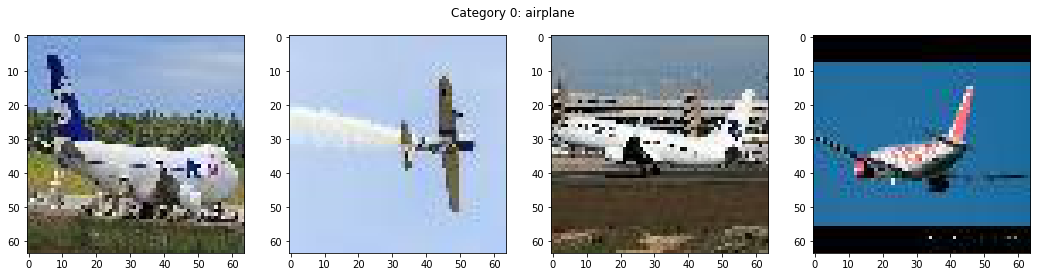

In [115]:
dataset = MyDataset('gdrive/MyDrive/hw4/train2014.nosync')
fig, ax = plt.subplots(1, 4)
ax[0].imshow(dataset.__getitem__(0)[0])
ax[1].imshow(dataset.__getitem__(0)[0])
ax[2].imshow(dataset.__getitem__(0)[0])
ax[3].imshow(dataset.__getitem__(0)[0])
fig.set_figheight(4)
fig.set_figwidth(18)
fig.suptitle('Category 0: airplane')


Text(0.5, 0.98, 'Category 1: bus')

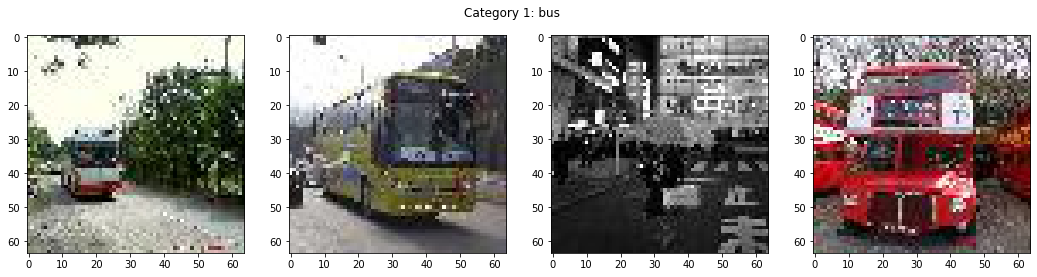

In [116]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(dataset.__getitem__(1)[0])
ax[1].imshow(dataset.__getitem__(1)[0])
ax[2].imshow(dataset.__getitem__(1)[0])
ax[3].imshow(dataset.__getitem__(1)[0])
fig.set_figheight(4)
fig.set_figwidth(18)
fig.suptitle('Category 1: bus')

Text(0.5, 0.98, 'Category 2: cat')

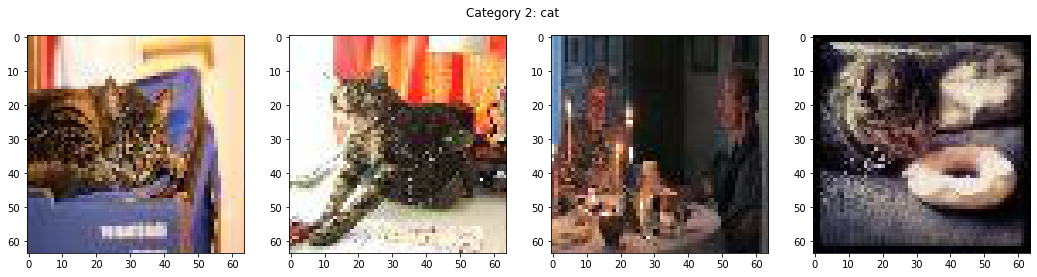

In [120]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(dataset.__getitem__(2)[0])
ax[1].imshow(dataset.__getitem__(2)[0])
ax[2].imshow(dataset.__getitem__(2)[0])
ax[3].imshow(dataset.__getitem__(2)[0])
fig.set_figheight(4)
fig.set_figwidth(18)
fig.suptitle('Category 2: cat')

Text(0.5, 0.98, 'Category 3: dog')

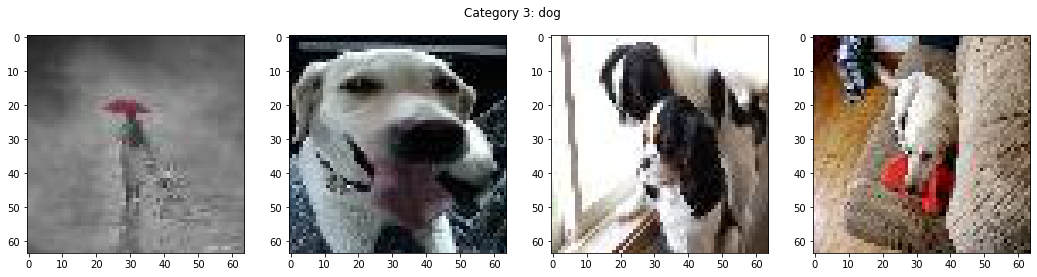

In [114]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(dataset.__getitem__(3)[0])
ax[1].imshow(dataset.__getitem__(3)[0])
ax[2].imshow(dataset.__getitem__(3)[0])
ax[3].imshow(dataset.__getitem__(3)[0])
fig.set_figheight(4)
fig.set_figwidth(18)
fig.suptitle('Category 3: dog')

Text(0.5, 0.98, 'Category 4: pizza')

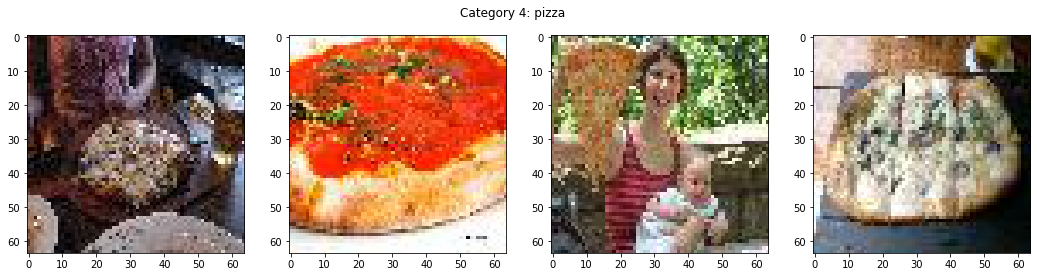

In [121]:
fig, ax = plt.subplots(1, 4)
ax[0].imshow(dataset.__getitem__(4)[0])
ax[1].imshow(dataset.__getitem__(4)[0])
ax[2].imshow(dataset.__getitem__(4)[0])
ax[3].imshow(dataset.__getitem__(4)[0])
fig.set_figheight(4)
fig.set_figwidth(18)
fig.suptitle('Category 4: pizza')

In [23]:
class HW4Net(): 

  def __init__(self, data): 
    self.data = data
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  class Net1(nn.Module):
    ## CNN Task 1
    def __init__(self):
      super().__init__() 
      self.conv1 = nn.Conv2d(3, 16, 3) 
      self.pool = nn.MaxPool2d(2, 2) 
      self.conv2 = nn.Conv2d(16, 32, 3) 
      self.fc1 = nn.Linear(32*14*14, 64) 
      self.fc2 = nn.Linear(64, 5)
      
    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x))) 
      x = self.pool(F.relu(self.conv2(x))) 
      x = x.view(x.shape[0], -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

  class Net2(nn.Module):
    ## CNN Task 1
    def __init__(self):
      super().__init__() 
      self.conv1 = nn.Conv2d(3, 16, 3, padding = 1) 
      self.pool = nn.MaxPool2d(2, 2) 
      self.conv2 = nn.Conv2d(16, 32, 3, padding = 1) 
      self.fc1 = nn.Linear(32*16*16, 64) 
      self.fc2 = nn.Linear(64, 5)
      
    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x))) 
      x = self.pool(F.relu(self.conv2(x))) 
      x = x.view(x.shape[0], -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x
  
  class Net3(nn.Module):
    ## CNN Task 1
    def __init__(self):
      super().__init__() 
      self.conv1 = nn.Conv2d(3, 16, 3, padding = 1) 
      self.pool = nn.MaxPool2d(2, 2) 
      self.conv2 = nn.Conv2d(16, 32, 3, padding = 1) 
      self.conv3 = nn.Conv2d(32, 32, 3, padding = 1) 
      self.fc1 = nn.Linear(32*16*16, 64) 
      self.fc2 = nn.Linear(64, 5)
      
    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x))) 
      x = self.pool(F.relu(self.conv2(x))) 
      for layer in range(9):
        x =  F.relu(self.conv3(x))
      x = x.view(x.shape[0], -1)
      x = F.relu(self.fc1(x))
      x = self.fc2(x)
      return x

  class MyDataset(torch.utils.data.Dataset):
    # This class was copied from homework 2.
    def __init__(self, root):
      super().__init__()
      # Obtain meta information (e.g. list of file names) 
      self.root = root
      self.files = []
      for file in os.listdir(root):
          if file.endswith(".jpg") or file.endswith(".jpeg"):
              self.files.append(file)
      # Initialize data transforms, to tensor and normalization.
      self.transform = tvt.Compose([tvt.ToTensor() \
                          ,tvt.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])])  

    def __len__(self):
      # Return the total number of images in dataset
      return len(self.files)

    def __getitem__(self, index):
        # Read an image at index and perform augmentations
        if self.transform:
            image = self.transform(Image.open(self.root + "/" + self.files[index]).convert('RGB'))
        # Get label from annotations from file name
        label = os.path.splitext(self.files[index])[0]
        label = label.split("_")
        labels = ['airplane', 'bus', 'cat', 'dog', 'pizza']
        label = labels.index(label[0])
       
        return image, label

  def load_train_data(self):
    self.train_data = self.MyDataset(self.data)
    self.train_data_loader = DataLoader(self.train_data, batch_size=4, shuffle=True, num_workers=2)

  def load_val_data(self, val_data_path):
    self.val_data = self.MyDataset(val_data_path)
    self.val_data = DataLoader(self.val_data, batch_size=4, shuffle=False, num_workers=2)

  def run_network(self, net, epochs = 7):
    # From the homework handaout
    loss_tally = []
    
    net = net.to(self.device)
    criterion = torch.nn.CrossEntropyLoss() 
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.99)) 
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(self.train_data_loader):
            inputs , labels = data
            inputs = inputs.to(self.device)
            labels = labels.to(self.device) 
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs , labels) 
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if (i+1) % 100 == 0:
                print("[epoch: %d, batch: %5d] loss: %.3f" % (epoch + 1, i + 1, running_loss / 100))
                loss_tally.append(running_loss / 100)
                running_loss = 0.0
    return loss_tally

  def plot_confusion_matrix(self, net, figure_number):
    # The confusion matrix was done using seaborn and sklearn modules
    # The code used is inspired in the following repository. 
    # https://github.com/cbernecker/medium/blob/main/confusion_matrix.ipynb

    y_pred = []
    y_true = []

    # iterate over test data
    for inputs, labels in self.val_data:
            
      inputs, labels = inputs.to(self.device), labels.to(self.device)
      output = net(inputs) # Feed Network

      output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
      y_pred.extend(output) # Save Prediction
      
      labels = labels.data.cpu().numpy()
      y_true.extend(labels) # Save Truth

    # constant for classes
    cats = ('airplane', 'bus', 'cat', 'dog', 'pizza')

    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in cats],
                        columns = [i for i in cats])
    plt.figure(figsize = (12,7))
    ax = plt.axes()
    sn.heatmap(df_cm, annot=True, ax = ax)
    ax.set_title('Figure {0}: Confussion Matrix {1}'.format(figure_number, type(net).__name__))
    # Store the accuracy of the model in the instance.
    self.accuracy = accuracy_score(y_true, y_pred)


# CNN Task 1

In [ ]:
hw4Net1 = HW4Net('gdrive/MyDrive/hw4/train2014.nosync')
model_Net1 = hw4Net1.Net1()
hw4Net1.load_train_data()
loss_Net1 = hw4Net1.run_network(model_Net1, epochs= 15)

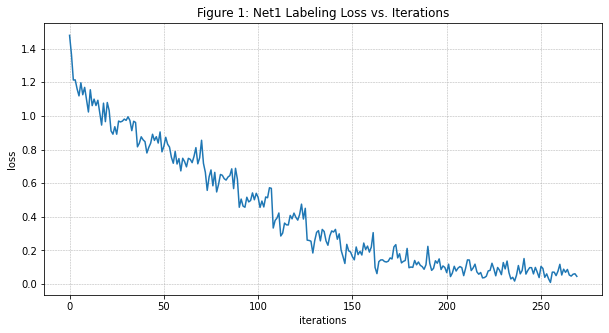

In [13]:
plt.figure(figsize=(10,5))
plt.title("Figure 1: Net1 Labeling Loss vs. Iterations")
plt.plot(loss_Net1)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

Net1 accuracy is: 0.5708


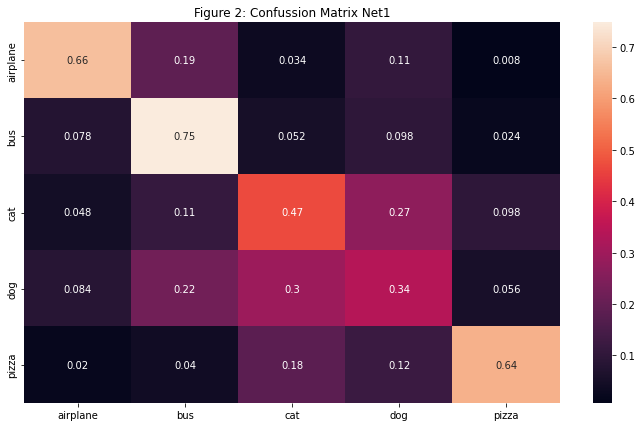

In [14]:
hw4Net1.load_val_data('gdrive/MyDrive/hw4/val2014.nosync')
hw4Net1.plot_confusion_matrix(model_Net1, 2)
print("Net1 accuracy is: " + str(hw4Net1.accuracy))

# CNN Task 1

In [ ]:
hw4Net2 = HW4Net('gdrive/MyDrive/hw4/train2014.nosync')
model_Net2 = hw4Net2.Net2()
hw4Net2.load_train_data()
loss_Net2 = hw4Net2.run_network(model_Net2,epochs=15)

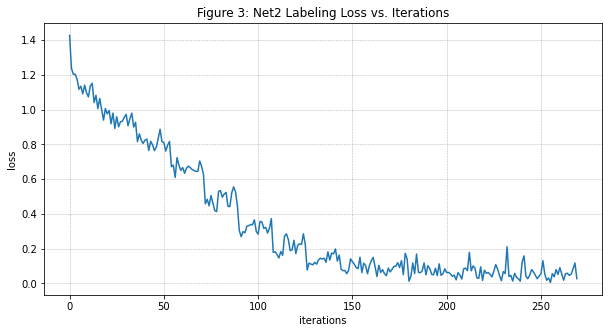

In [16]:
plt.figure(figsize=(10,5))
plt.title("Figure 3: Net2 Labeling Loss vs. Iterations")
plt.plot(loss_Net2)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

Net2 accuracy is: 0.5844


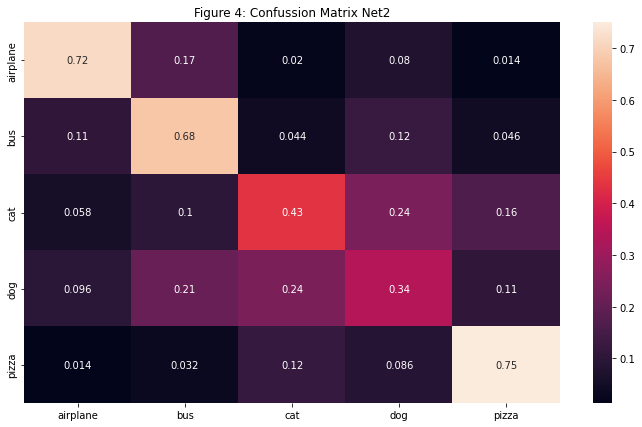

In [17]:
hw4Net2.load_val_data('gdrive/MyDrive/hw4/val2014.nosync')
hw4Net2.plot_confusion_matrix(model_Net2,4)
print("Net2 accuracy is: " + str(hw4Net2.accuracy))

# CNN Task 3

In [ ]:
hw4Net3 = HW4Net('gdrive/MyDrive/hw4/train2014.nosync')
model_Net3 = hw4Net3.Net3()
hw4Net3.load_train_data()
loss_Net3 = hw4Net3.run_network(model_Net3, epochs= 15)

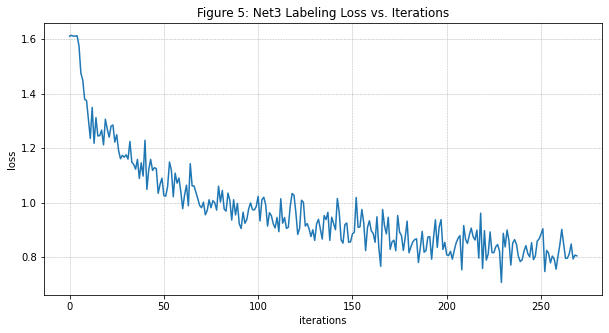

In [19]:
plt.figure(figsize=(10,5))
plt.title("Figure 5: Net3 Labeling Loss vs. Iterations")
plt.plot(loss_Net3)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

Net3 accuracy is: 0.6168


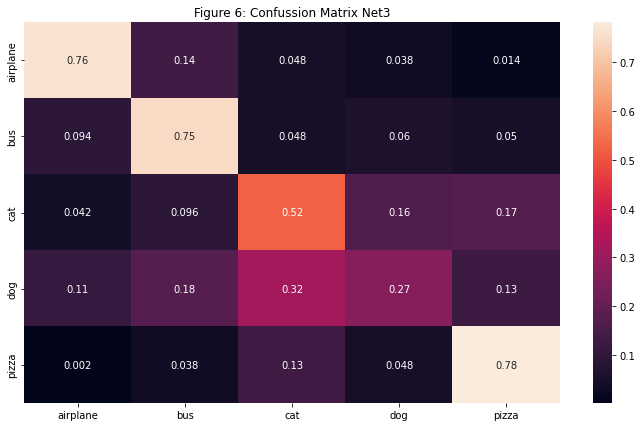

In [20]:
hw4Net3.load_val_data('gdrive/MyDrive/hw4/val2014.nosync')
hw4Net3.plot_confusion_matrix(model_Net3, 6)
print("Net3 accuracy is: " + str(hw4Net3.accuracy))

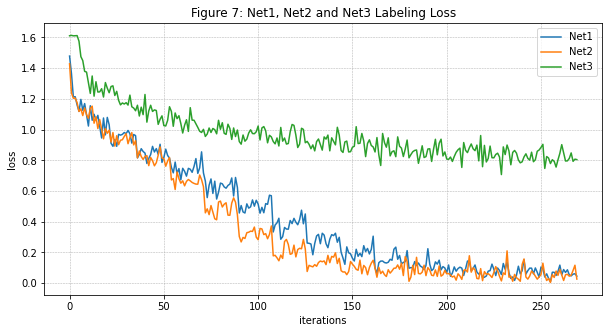

In [21]:
plt.figure(figsize=(10,5))
plt.title("Figure 7: Net1, Net2 and Net3 Labeling Loss")
plt.plot(loss_Net1)
plt.plot(loss_Net2)
plt.plot(loss_Net3)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend(["Net1","Net2","Net3"])
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

1. Does adding padding to the convolutional layers make a difference in classification performance?

Padding appears to have a negligible influence on performance. Based on the several runs, the losses and accuracies remained close without a clear winner. Nonetheless, Net2 had a better classification accuracy in the final run. This is most likely due to padding, which helps to maintain more detail in the images. In terms of loss, Net1 and Net2 appear to function similarly.

2. As you may have known, naively chaining a large number of layers can result in difficulties in training. This phenomenon is often referred to as vanishing gradient. Do you observe something like that in Net3?


Yes, the "Net1, Net2, and Net3 Labeling Loss" figure 7 shows the vanishing gradient issue. As we can see, NET3 appears to converge more slowly and does not obtain the same loss values as Net1 and Net2. This can occur when the network is very deep, in this case more than 10 layesrs, because the gradients must transit through numerous layers of non-linear activation functions and weight parameters, causing the gradients to decay or disappear entirely.

3. Compare the classification results by all three networks, which CNN do you think is the best performer?

Net3, the network that included padding and more than 10 convolutional layers, is the top performer in this situation, followed by Net2 and Net1 with accuracy values of 0.6168, 0.0.5844, and 0.0.5708, respectively. As previously noted, padding helps to keep more detail in the images, which aids in the model's convergence and accuracy. It's worth noting that the loss of Net2 appears to be decreasing faster than Net1, indicating that padding is actually helpful in this area too. Yet, it appears that both models Net1 and Net2 eventually converge on a comparable conclusion. Net3, on the other hand, does not appear to reach the same loss levels as Net1 and Net2 while improving accuracy. It is important to emphasize that Net3 was not always the best performer. Net2 performed better in some training runs than others.

4. By observing your confusion matrices, which class or classes do you think are more difficult to correctly differentiate and why?

The most challenging class to forecast in the three models was actually the dog, which is not surprising given how similar and dissimilar dogs and cats are to all the other classes such as airplane, bus, and pizza. With the rows representing actual observations and the columns representing expected values, we can see that there was a significant percentage of dogs classified as cats. The real dog classes in Net2 and Net3 were less than the wrongly classified classes.

5. What is one thing that you propose to make the classification performance better?

First, we could increase the size of the images. Resizing the images to 64x64, significantly reduces the image quality. Also increasing the amount of training data is one method for improving classification performance. Increased data in the model can help it catch more variations in the data and reduce overfitting, resulting in better validation set performance. Another option is to employ data augmentation techniques similar to those used in homework 2. These methods include generating new training examples from existing data using transformations such as random cropping, flipping, or rotation. Finally, by adjusting model hyperparameters such as learning rate and batch size, classification results can also be improved.